## Task 1.1

In [14]:
!pip install matplotlib

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import os 
from PIL import Image
import cv2 

def center(images):
    newImages = images - np.mean(images, axis = 0)
    return newImages

def standardize(images):
    newImages = center(images)/np.std(images, axis = 0)
    return newImages

def printAll(category_images, category, axes): 
    for i, img in enumerate(category_images):
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"{category} - Image {i+1}")
        axes[i].axis('off')
    plt.show()

def whiten(images):
    num_samples, height, width, num_channels = images.shape
    images_reshaped = np.reshape(images, (num_samples, -1))

    # Center the data
    mean_images = np.mean(images_reshaped, axis=0)
    centered_images = images_reshaped - mean_images

    # Calculate the covariance matrix
    cov_matrix = np.cov(centered_images, rowvar=False)

    # Perform PCA
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Whitening transformation matrix
    whitening_matrix = np.diag(1.0 / np.sqrt(eigenvalues + 1e-5))

    # Apply whitening transformation
    whitened_images = np.dot(np.dot(centered_images, eigenvectors), whitening_matrix).dot(eigenvectors.T)

    # Reshape the whitened images back to original shape
    whitened_images = np.reshape(whitened_images, (num_samples, height, width, num_channels))

    return whitened_images


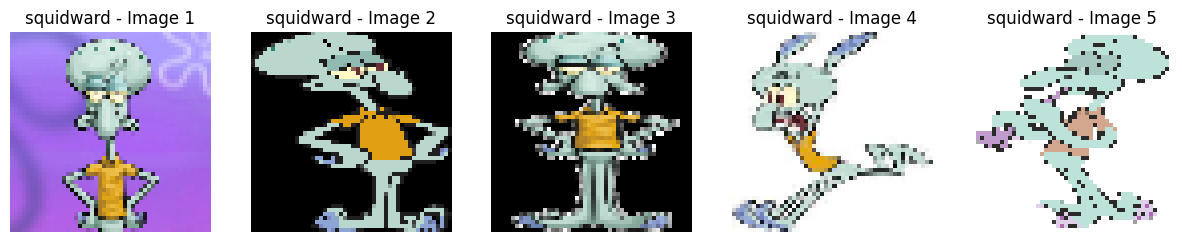

(25, 50, 50, 3)


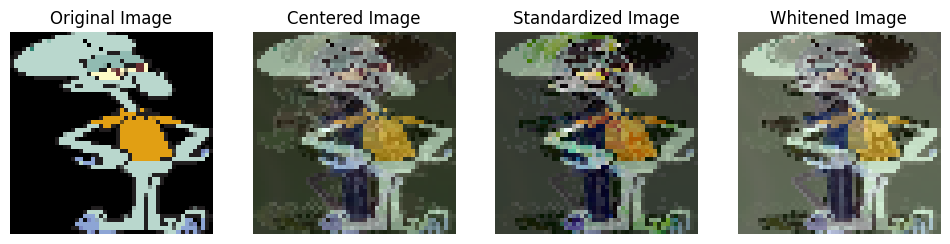

In [4]:

data_dir = "C:\\Users\\malko\\Desktop\\Skola\\D7041E-labs\\lab1\\pictures"
categories = os.listdir(data_dir)
x, y = 50, 50
all_images = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    category_images = []

    for filename in os.listdir(category_path):
        img_path = os.path.join(category_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (x, y))
        category_images.append(img)
        all_images.append(img)

    

# Create a single row of subplots for each category
num_images = len(category_images)
fig, axes = plt.subplots(1, num_images, figsize=(15, 3)) 
printAll(category_images, category, axes)
all_images_np = np.array(all_images)
print(all_images_np.shape)



category_images_np = np.array(category_images)
whitened_category_images = whiten(category_images_np)

i= 1
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(category_images[i], cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
centered_image = center(category_images_np)[i]
centered_image = ((centered_image - centered_image.min()) * (1/(centered_image.max() - centered_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(centered_image, cv2.COLOR_BGR2RGB))
plt.title("Centered Image")
plt.axis('off')

plt.subplot(1, 4, 3)
standardized_image = standardize(category_images_np)[i]
standardized_image = ((standardized_image - standardized_image.min()) * (1/(standardized_image.max() - standardized_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(standardized_image, cv2.COLOR_BGR2RGB))
plt.title("Standardized Image")
plt.axis('off')

plt.subplot(1, 4, 4)
whitened_image = whitened_category_images[i]
whitened_image = ((whitened_image - whitened_image.min()) * (1/(whitened_image.max() - whitened_image.min()) * 255)).astype('uint8')
plt.imshow(cv2.cvtColor(whitened_image, cv2.COLOR_BGR2RGB))
plt.title("Whitened Image")
plt.axis('off')

plt.show()

## Task 1.2

In [5]:
from keras.datasets import mnist
import numpy as np

file_path = 'C:\\Users\\malko\\Desktop\\Skola\\D7041E-labs\\lab1\\vecs.npy'
data = np.load(file_path, allow_pickle=True).item()


def get_pos_data(data, pos):

    embeddings = []
    labels = []
    position_key = f'{pos}_pos'
    for digit, embedding_list in data[position_key].items():
            for embedding in embedding_list:
                embeddings.append(embedding)
                labels.append(digit)
    
    embeddings = np.array(embeddings)
    labels = np.array(labels)
    return(embeddings, labels)

def randomly_perm(embeddings, labels):
    assert len(embeddings) == len(embeddings), "Must be same length"

    perm = np.random.permutation(len(embeddings))
    
    perm_embeddings = embeddings[perm]
    perm_labels = labels[perm]

    return perm_embeddings, perm_labels



# change the second argument for different positions
embeddings, labels = get_pos_data(data, 1)
print(labels[:30])
embeddings, labels = randomly_perm(embeddings, labels)
print(labels[:30])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[8 4 2 4 4 0 5 1 3 4 4 1 8 4 7 3 8 2 2 5 1 8 7 8 9 6 3 6 4 8]


## Task 2.1

In [6]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [7]:
Xtr.shape

(60000, 28, 28)

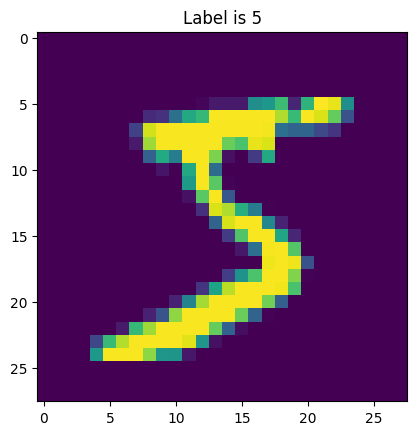

In [8]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


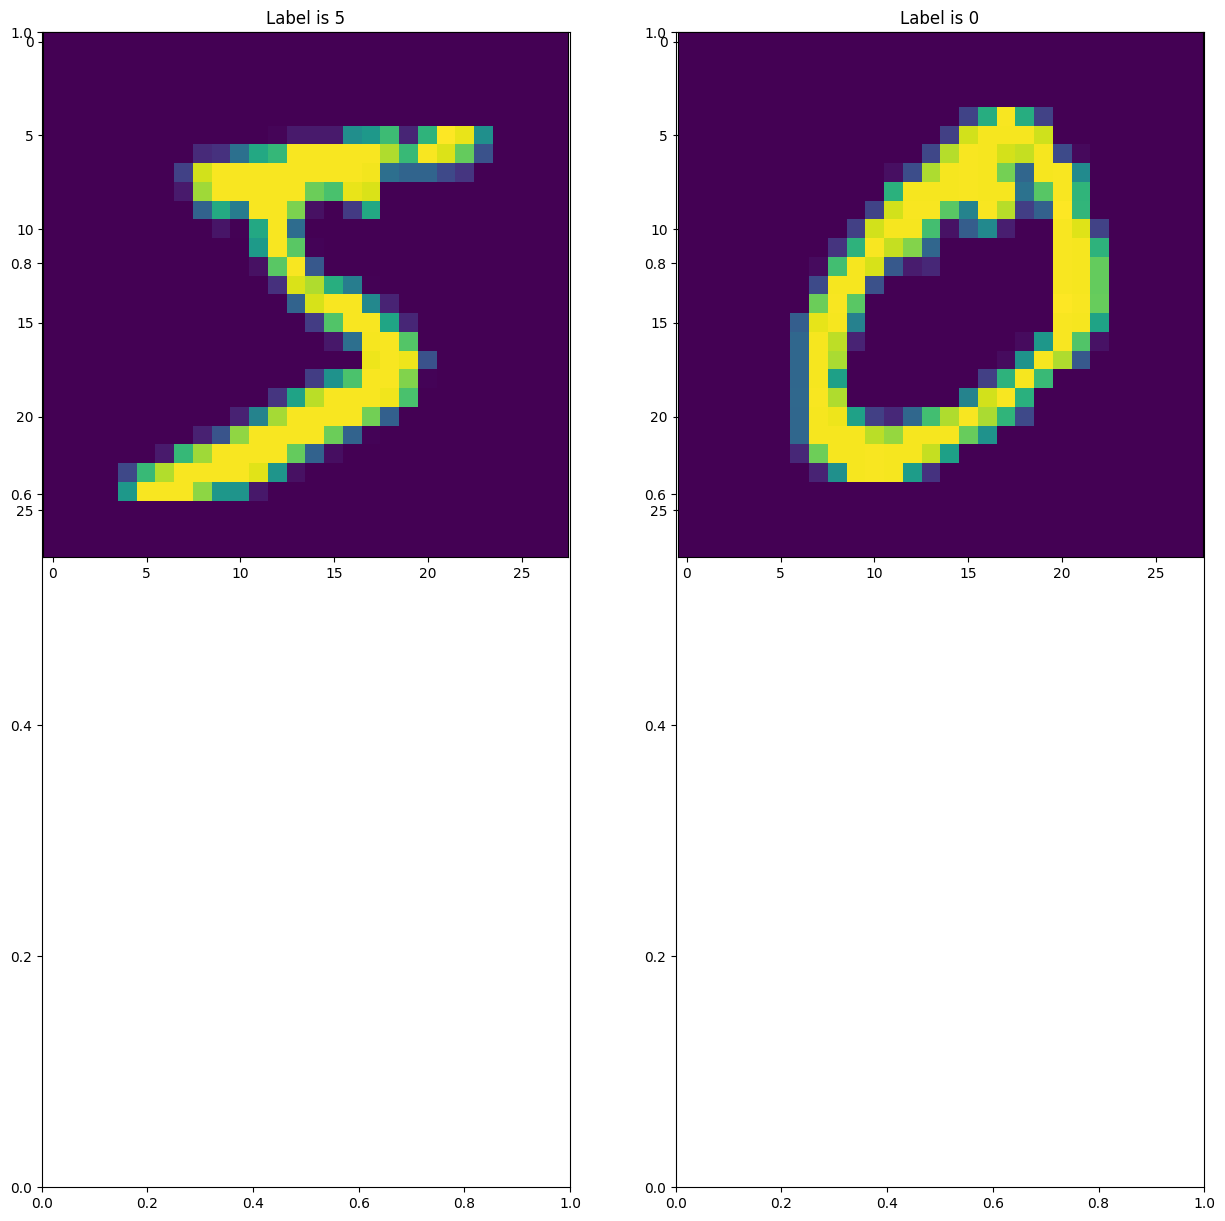

In [9]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [10]:
28*28

784

In [11]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [12]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [13]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649
